In [65]:
import numpy as np
import torch 
import torch.nn as nn
import torch.optim as optimizer
import torch.nn.functional as F
import matplotlib.pyplot as plt

xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype=np.float32)


In [66]:
x = xy[:,:-1]
y = xy[:,[-1]]

X_train = torch.Tensor(x[:601])
Y_train = torch.Tensor(y[:601])

X_TEST = torch.Tensor(x[601:721])
Y_TEST = torch.Tensor(y[601:721])

Epoch    0 Cost: 0.709831 Accuracy 44.93%
Epoch   10 Cost: 0.670298 Accuracy 61.73%
Epoch   20 Cost: 0.646859 Accuracy 63.89%
Epoch   30 Cost: 0.632371 Accuracy 65.39%
Epoch   40 Cost: 0.622731 Accuracy 65.56%
Epoch   50 Cost: 0.615778 Accuracy 66.06%
Epoch   60 Cost: 0.610355 Accuracy 66.06%
Epoch   70 Cost: 0.605835 Accuracy 65.89%
Epoch   80 Cost: 0.601871 Accuracy 65.72%
Epoch   90 Cost: 0.598267 Accuracy 65.89%
Epoch  100 Cost: 0.594915 Accuracy 66.06%
Epoch  110 Cost: 0.591747 Accuracy 66.06%
Epoch  120 Cost: 0.588725 Accuracy 66.39%
Epoch  130 Cost: 0.585827 Accuracy 66.39%
Epoch  140 Cost: 0.583037 Accuracy 67.05%
Epoch  150 Cost: 0.580344 Accuracy 67.39%
Epoch  160 Cost: 0.577743 Accuracy 67.39%
Epoch  170 Cost: 0.575226 Accuracy 67.72%
Epoch  180 Cost: 0.572789 Accuracy 67.89%
Epoch  190 Cost: 0.570431 Accuracy 68.22%
Epoch  200 Cost: 0.568146 Accuracy 68.72%
Epoch  210 Cost: 0.565932 Accuracy 69.38%
Epoch  220 Cost: 0.563785 Accuracy 69.38%
Epoch  230 Cost: 0.561705 Accuracy

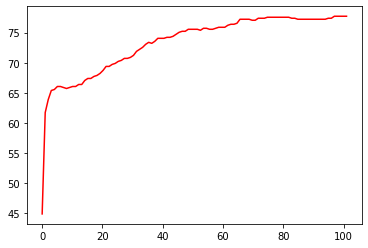

In [67]:
class Diabetes(nn.Module):
    def __init__(self):
        super().__init__()
        #self.Weight = nn.Parameter(torch.zeros(8,1),requires_grad = True)
        #self.Bias = nn.Parameter(torch.zeros(1), requires_grad = True)
        self.Linear  = nn.Linear(8,1)
        self.Sigmoid = nn.Sigmoid()
    def forward(self,x_input):
        return self.Sigmoid(self.Linear(x_input))
ACC_List = []
Decision_Model = Diabetes()
Optimizer = optimizer.SGD(Decision_Model.parameters(), lr=0.05 , momentum=0.1)
for Epoch in range(1001):
    hypothesis = Decision_Model(X_train)
    cost = F.binary_cross_entropy(hypothesis, Y_train)
    Optimizer.zero_grad()
    cost.backward()
    Optimizer.step()
    if Epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == Y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        ACC_List.append(accuracy*100)
        print('Epoch {:4d} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            Epoch, cost.item(), accuracy * 100,
        ))
x = np.linspace(0,101,101)
plt.plot(x,ACC_List,'r')
plt.show()